In [4]:
import requests
from IPython.display import Markdown

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import re

**Warning!** This is a soultion. If you are looking to do these 
           [Agile Geosciences](https://agilescientific.com/blog/2020/4/16/geoscientist-challenge-thyself) 
           challenges on your own then please visit this
           [Jupyter Notebook](https://colab.research.google.com/drive/1eP68NTV-GA3R-BYUh-CUxcgYDQ5IuetS)
           to get started.


## Functions for URL requests
First a few functions to use along the way...

In [5]:
def get_data(url, key):
    params = {'key':my_key}
    r = requests.get(url, params)
    return r.text

def get_question(url):
    r = requests.get(url)
    return r.text

def check_answer(questionNum,answer):
    params = {'key':my_key,
              'question':questionNum,
              'answer':answer
             }
    result = requests.get(url, params)
    return Markdown(result.text)

## Request Challenge Description

In [6]:
url = 'https://kata.geosci.ai/challenge/fossil-hunting' 
r = get_question(url)

Markdown(r)

# Fossil hunting

We have some fossil abundance data. Each record contains a number, which represents a geological age, and zero or more fossil symbols. One symbol represents one example of that fossil. For example, we might have a record like this:

    349.8🦐🐚🐚🐟🐟🦐
    
The number is the age of the sample in units of 'millions of years before the present', to 4 significant figures, and is unique (there are no duplicate records). It is immediately followed by the fossil counts for that sample. For example, this record indicates that the samples collected from rocks with age = 349.8 Ma contained two shrimps, two gastropod shells, and two fish specimens.

Your actual dataset will be much larger than this. It's also less organized: the records are not in order.

There are four questions to answer about your data:

1. How many samples are there of the most abundant organism?
2. What is the age of the oldest record with maximum diversity?
3. What is the span (first to last appearance) of the most abundant organism?
4. At what age is the latest appearance of the last fossil to appear?

When the answer is an age, give 1 decimal place of precision.


## Example

    345.1🐟
    346.2🐚🐚🐟
    348.7🐚🦐
    349.8🦐🐚🐚🐟🐟🦐
    350.0🐚🦐🦐🐚🦐🦐
    351.7🦐🐟🦐
    353.8🦐
    354.9

We'd answer the questions this way:

1. The most abundant organism is the shrimp, with **10** specimens.
2. The oldest record with the maximum diversity (3 fossil types) is **349.8**
3. The span of the most abundant organism (the shrimp) is 353.8 - 348.7 = **5.1**
4. The last fossil to appear (the shell) last appears at an age of **346.2**


## A quick reminder how this works

You can retrieve your data by choosing any Python string as a **`<KEY>`** and substituting here:

    https://kata.geosci.ai/challenge/fossil-hunting?key=<KEY>
                                                        ^^^^^
                                                        any old string you like

To answer question 1, make a request like:

    https://kata.geosci.ai/challenge/fossil-hunting?key=<KEY>&question=1&answer=123
                                                        ^^^^^          ^        ^^^
                                                        your key       Q        your answer

[Complete instructions at kata.geosci.ai](https://kata.geosci.ai/challenge)

----

© 2020 Agile Scientific, licensed CC-BY

## My solution

Let's enter a seed phrase and get the data.

In [14]:
my_key = 'armstrys'

## Input
r = get_data(url, my_key)

## Print the data
print(r[:100])
## Print the raw data in bytes so we can see what makes an emoji
print(r[:100].encode('unicode escape'))

344.6🐟🐟🐟🌟🌿🌟🦄🦐🐠🦐🦄🦄🐠🐟🐠🦐🌟🐟🐠🌟🌟🦐🐠🦐🐠🌟🐠🐠🌟🦄🦄🌟🦄🌟🐟🐠🦄🐠🌿🦄🐠🐠🌟🦄🐟🌟🦄🦄🌟🐠🦐🌟🌟🦐🐠🌟🌟🦐🦄🐠🐠🦐🐟320.3🦄🦄🐠🐟🐠🌟🐠🦄🦄🌿🌿🐠🐠🐠🌿🦄🌿🦄🌿🌿🐟🌿🌿🌿🦄🐠🌿
b'344.6\\U0001f41f\\U0001f41f\\U0001f41f\\U0001f31f\\U0001f33f\\U0001f31f\\U0001f984\\U0001f990\\U0001f420\\U0001f990\\U0001f984\\U0001f984\\U0001f420\\U0001f41f\\U0001f420\\U0001f990\\U0001f31f\\U0001f41f\\U0001f420\\U0001f31f\\U0001f31f\\U0001f990\\U0001f420\\U0001f990\\U0001f420\\U0001f31f\\U0001f420\\U0001f420\\U0001f31f\\U0001f984\\U0001f984\\U0001f31f\\U0001f984\\U0001f31f\\U0001f41f\\U0001f420\\U0001f984\\U0001f420\\U0001f33f\\U0001f984\\U0001f420\\U0001f420\\U0001f31f\\U0001f984\\U0001f41f\\U0001f31f\\U0001f984\\U0001f984\\U0001f31f\\U0001f420\\U0001f990\\U0001f31f\\U0001f31f\\U0001f990\\U0001f420\\U0001f31f\\U0001f31f\\U0001f990\\U0001f984\\U0001f420\\U0001f420\\U0001f990\\U0001f41f320.3\\U0001f984\\U0001f984\\U0001f420\\U0001f41f\\U0001f420\\U0001f31f\\U0001f420\\U0001f984\\U0001f984\\U0001f33f\\U0001f33f\\U0001f420\\U0001f420\\U0001f420\\U0001f33f\\U0001f984\\U0001f33f\\U0001

## Making the text meaningful
The input text to this challenge is complicated. We don't have any sort of delimiting characters. Both the ages and the content of the samples vary in length. We even have samples (at least 1) that don't contain any fossils. To extract the samples we are going to use a find all and look for a set of 4 digits(`0-9`) or a decimal point (`.`) followed by 1 or more of any other character. Fortunately, `re` will have no problem recognizing patterns on the bytes that make up an emoji! See above for an example.
         
We'll then create a nested dictionary that is organized first by ages and then by fossil. Each fossil will then have a count of it's abundance during that year. Later we will need to reorganize this dictionary to be more easily keyed into by fossil types, but this initial organization will get us through a few questions.

In [15]:
def process_text(text):
    '''
    Take repeating pattern of numbers and emoji and create an abundance dict.
    We can then process this abundance dictionary ({Age: {fossil: count}}) to answer the questions. 
    '''
    # Find all instances of 1-precision numbers followed by non-digits
    samples = re.findall(pattern=r'[0-9.]{1,5}[^0-9.]+', string=text)

    abundance_dict = {}
    for sample in samples:
        sample_dict = {}
        # separate numbers from emojis
        age = float(re.search(pattern=r'[0-9.]{1,5}', string=sample).group(0))
        # separate emojis
        fossils = re.search(pattern=r'[^0-9.]+', string=sample).group(0)
        for fossil in fossils:
            if fossil not in sample_dict.keys():
                sample_dict.update({fossil:1})
            else:
                sample_dict[fossil] += 1
        
        ## Assign the sample dictionary to the appropriate age
        abundance_dict.update({age:sample_dict})
    return abundance_dict

abundance_dict = process_text(r)

## Example entry
abundance_dict[344.6]

{'🐟': 8, '🌟': 16, '🌿': 2, '🦄': 12, '🦐': 9, '🐠': 16}

## Question 1
To find the most abundant fossil, just loop through our ages and create a new dictionary that stores total abundance counts by fossil type.

In [16]:
def total_abundance(abundance_dict):
    '''
    Take the detailed abundance dictionary and calculate total abundance of each fossil.
    '''
    total_dict = {}
    for fossils in abundance_dict.values():
        for fossil, abund in fossils.items():
            if fossil not in total_dict.keys():
                total_dict.update({fossil:abund})
            else:
                total_dict[fossil] += abund
    return total_dict
total_dict = total_abundance(abundance_dict)

## retrieve the most abundant id (for later use) and it's abundance.
answer1 = max(total_dict.values())
mostID = max(total_dict.keys(), key=(lambda k: total_dict[k]))

print('Here are the abundances of each fossil:')
total_dict


Here are the abundances of each fossil:


{'🐟': 1194,
 '🌟': 1665,
 '🌿': 2140,
 '🦄': 2137,
 '🦐': 2097,
 '🐠': 1747,
 '🐚': 2266,
 '🦠': 804}

In [17]:
Markdown(f'The most abundant fossil, {mostID}, was counted **{answer1}** times!\n')


The most abundant fossil, 🐚, was counted **2266** times!


In [27]:
## Check
questionNum = 1
check_answer(questionNum,answer1)

Correct

## Question 2
According to these fossil records, there were some years that had more diversity than others. We are going to loop through our dictionary and store the the year that has the highest diversity we've seen. If two years have the same diversity, we will take the oldest year.

In [28]:
def oldest_max_diversity(abundance_dict):
    '''
    Find the oldest year with the maximum amount of diversity seen.
    '''
    omd = 0
    omd_year = 0
    for year, fossils in abundance_dict.items():
        if len(fossils) > omd:
            omd = len(fossils)
            omd_year = year
        elif len(fossils) == omd and year > omd_year:
            omd = len(fossils)
            omd_year = year

    return omd_year, omd
omd_year, omd = oldest_max_diversity(abundance_dict)

answer2 = float(omd_year)

Markdown(f'''Oldest year of maximum diversity was **{answer2}** mya with all these fossils:\n{''.join((abundance_dict[omd_year].keys()))}
       ''')



Oldest year of maximum diversity was **282.8** mya with all these fossils:
🦄🌿🦐🐠🌟🐚🦠🐟
       

In [29]:
## Check
questionNum = 2
check_answer(questionNum,answer2)

Correct

## Question 3
Below we calculate the span (first to last appearance) of the most abundant fossil. There is a select box so that you can check the span of other fossils as well, but the select box will default to the appropriate fossil to answer the question.

In [30]:

def span_ID(id, abundance_dict):
    '''
    Find the first an last appearance of a given fossil.
    '''
    first = 0
    last = 99999999
    for year, fossils in abundance_dict.items():
        if id in fossils.keys() and year > first:
            first = year
            
        if id in fossils.keys() and year < last:
            last = year

    return first, last

first, last = span_ID(mostID, abundance_dict)

answer3 = float(f'{(first-last):.1f}')

Markdown(f'''{mostID} first appeared {first} mya and was last seen {last} mya. That gives a span of **{answer3:.1f}** million years!
         ''')



🐚 first appeared 289.1 mya and was last seen 162.2 mya. That gives a span of **126.9** million years!
         

In [31]:
## Check
questionNum = 3
check_answer(questionNum,answer3)

Correct

## Question 4
First let's organize the years of appearance by fossil. This is basically a swap of the keys and values from the first dictionary we created.

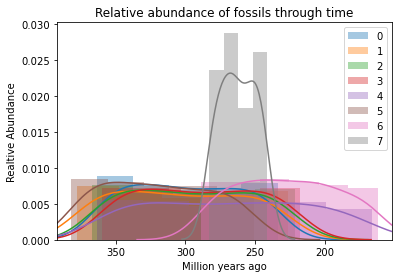

Legend->  0:🐟  1:🌟  2:🌿  3:🦄  4:🦐  5:🐠  6:🐚  7:🦠  


In [32]:
def switchKeysValues(abundance_dict):
    '''
    Make the fossils the keys and a list of years the values.
    '''
    fossilYear_dict = {}
    for year, fossils in abundance_dict.items():
        for fossil in fossils:
            if fossil not in fossilYear_dict.keys():
                fossilYear_dict.update({fossil:[year]})
            else:
                fossilYear_dict[fossil].append(year)

    return fossilYear_dict

fossilYear_dict = switchKeysValues(abundance_dict)

legend = ''
for i, items in enumerate(fossilYear_dict.items()):
    fossil, years = items
    sns.distplot(years, label=i, norm_hist=False, kde=True)
    plt.xlim(max(abundance_dict.keys())+10, min(abundance_dict.keys())-10)
    plt.xlabel('Million years ago')
    plt.ylabel('Realtive Abundance')
    plt.title('Relative abundance of fossils through time')
    legend += f'{i}:{fossil}  '
plt.legend()
plt.show()
print('Legend-> ',legend)

In [33]:
def findLatecomer(fossilYear_dict):
    '''
    Find the the last fossil to the party'
    '''
    late_year = 1e5
    for fossil, years in fossilYear_dict.items():
        if max(years) < late_year:
            late_year = max(years)
            idFossil = fossil
    return idFossil

idFossil = findLatecomer(fossilYear_dict)
first_appear = max(fossilYear_dict[idFossil])
answer4 = min(fossilYear_dict[idFossil])

Markdown(f'''The fossil {idFossil} first appeared {first_appear} mya and was present until **{answer4} mya**.
         ''')



The fossil 🦠 first appeared 282.8 mya and was present until **241.5 mya**.
         

In [34]:
## Check
questionNum = 4
check_answer(questionNum,answer4)

Correct! The next challenge is: https://kata.geosci.ai/challenge/true-vertical-depth - good luck!